In [1]:
import math
import numpy as np
import scipy.stats as stats
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn
import pandas
%matplotlib inline

np.random.seed(1)

#Box-Mueller algorithm
def box_mueller(z0, sigma, n):
    z1 = np.zeros(n)
    
    for i in range(n):
        x = np.random.rand(2)
        y1 = math.sqrt(-2*np.log(x[0]))*np.cos(2*math.pi*x[1])
        z1[i] = z0 + y1*sigma
        
    return z1

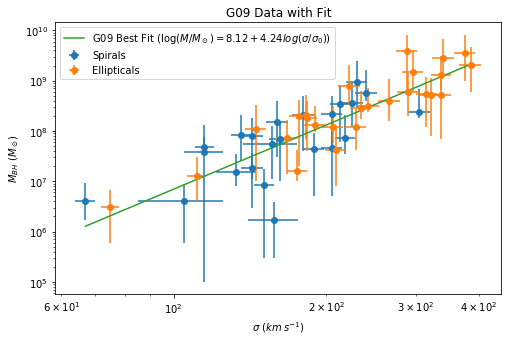

In [2]:
# DATA FROM GULTEKIN ET AL. (2009)

# create Table
#tab = Table.read('/media/jeremy/DATA/JeremyDATA/Arizona/Astro513/A513_project/table.tex')
tab = Table.read('data/table.tex')

# split data into galaxy types
sigma_spirals = []
sigma_ellipticals = []
sigma_err_spirals = []
sigma_err_ellipticals = []
M_spirals = []
M_ellipticals = []
M_low_spirals = []
M_low_ellipticals = []
M_high_spirals = []
M_high_ellipticals = []

# read table
for i in range(len(tab["Galaxy"])):
    # get data values
    sigma = float(tab["sigma"][i][1:-1])
    sigma_err = float(tab["sigma_err"][i][1:-1].replace("$\\tablenotemark{d", ""))
    M_BH = float(tab["M_BH"][i][1:-2].replace("\\times10^{", "e"))
    M_low = float(tab["M_low"][i][1:-2].replace("\\times10^{", "e"))
    M_high = float(tab["M_high"][i][1:-2].replace("\\times10^{", "e"))
    
    #if spiral and not elliptical
    if tab["Type"][i].find("S") != -1 and tab["Type"][i].find("E") == -1:
        sigma_spirals.append(sigma)
        sigma_err_spirals.append(sigma_err)
        M_spirals.append(M_BH)
        M_low_spirals.append(M_low)
        M_high_spirals.append(M_high)
        
    #elif elliptical and not spiral
    elif tab["Type"][i].find("S") == -1 and tab["Type"][i].find("E") != -1:
        sigma_ellipticals.append(sigma)
        sigma_err_ellipticals.append(sigma_err)
        M_ellipticals.append(M_BH)
        M_low_ellipticals.append(M_low)
        M_high_ellipticals.append(M_high)
            
# change lists to numpy arrays for calculation ease
M_spirals = np.array(M_spirals)
sigma_spirals = np.array(sigma_spirals)
M_ellipticals = np.array(M_ellipticals)
sigma_ellipticals = np.array(sigma_ellipticals)

# plot data in log space to see power law
plt.figure(figsize=(8,5))
plt.errorbar(sigma_spirals, M_spirals, [M_low_spirals, M_high_spirals], sigma_err_spirals, "o", label="Spirals")
plt.errorbar(sigma_ellipticals, M_ellipticals, [M_low_ellipticals, M_high_ellipticals], sigma_err_ellipticals, "o", label="Ellipticals")
xx = np.linspace(np.amin(sigma_spirals), np.amax(sigma_ellipticals), 100)
plt.plot(xx, 0.0231*xx**4.24, label=r"G09 Best Fit $(\log(M/M_\odot) = 8.12 + 4.24 log(\sigma/\sigma_0))$")
plt.xscale("Log")
plt.yscale("Log")
plt.ylabel("$M_{BH}$ $(M_\odot)$")
plt.xlabel("$\sigma$ $(km \: s^{-1})$")
plt.legend()
plt.title("G09 Data with Fit")
plt.show()

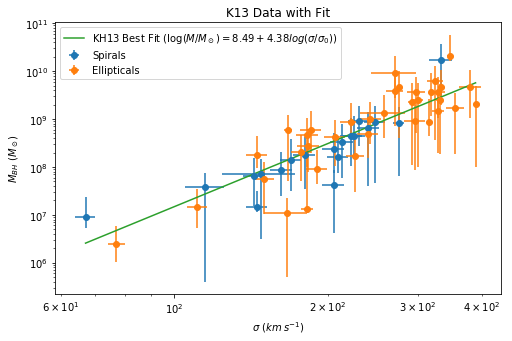

In [49]:
# DATA FROM KORMENDY & HO (2013)

# create Table
#M_ellipticals, M_low_ellipticals, M_high_ellipticals, sigma_ellipticals, sigma_err_ellipticals = np.loadtxt('/media/jeremy/DATA/JeremyDATA/Arizona/Astro513/A513_project/table2E.dat', unpack=True, usecols=(13,14,15,16,18))
#M_spirals, M_low_spirals, M_high_spirals, sigma_spirals, sigma_err_spirals = np.loadtxt('/media/jeremy/DATA/JeremyDATA/Arizona/Astro513/A513_project/table2SC.dat', unpack=True, usecols=(19,20,21,22,24))
M_ellipticals, M_low_ellipticals, M_high_ellipticals, sigma_ellipticals, sigma_err_ellipticals = np.loadtxt('data/ar4-ellipticalsv2.dat', unpack=True, usecols=(13,14,15,16,18))
M_spirals, M_low_spirals, M_high_spirals, sigma_spirals, sigma_err_spirals = np.loadtxt('data/ar4-bulgesv2.dat', unpack=True, usecols=(19,20,21,22,24))





# plot data in log space to see power law
plt.figure(figsize=(8,5))
plt.errorbar(sigma_spirals, M_spirals, [M_low_spirals, M_high_spirals], sigma_err_spirals, "o", label="Spirals")
plt.errorbar(sigma_ellipticals, M_ellipticals, [M_low_ellipticals, M_high_ellipticals], sigma_err_ellipticals, "o", label="Ellipticals")
xx = np.linspace(np.amin(sigma_spirals), np.amax(sigma_ellipticals), 100)
plt.plot(xx, 0.0258*xx**4.38, label=r"KH13 Best Fit $(\log(M/M_\odot) = 8.49 + 4.38 log(\sigma/\sigma_0))$")
plt.xscale("Log")
plt.yscale("Log")
plt.ylabel("$M_{BH}$ $(M_\odot)$")
plt.xlabel("$\sigma$ $(km \: s^{-1})$")
plt.legend()
plt.title("K13 Data with Fit")
plt.show()

In [17]:
np.random.seed(1)

# set up the data sets for fitting line in log space, including error propagation
# spirals
y1 = np.log10(M_spirals)
y1_best_err = np.array([max(M_spirals[i] - M_low_spirals[i], M_high_spirals[i] - M_spirals[i]) for i in range(len(M_spirals))])
y1_err = y1_best_err/(M_spirals*np.log(10))
x1 = np.log10(sigma_spirals)
x1_err = sigma_err_spirals/(sigma_spirals*np.log(10))


x1_err = np.full(len(x1_err),np.mean(x1_err))
y1_err = np.full(len(y1_err),np.mean(y1_err))


# ellipticals
y2 = np.log10(M_ellipticals)
y2_best_err = np.array([max(M_ellipticals[i] - M_low_ellipticals[i], M_high_ellipticals[i] - M_ellipticals[i]) for i in range(len(M_ellipticals))])
y2_err = y2_best_err/(M_ellipticals*np.log(10))
x2 = np.log10(sigma_ellipticals)
x2_err = sigma_err_ellipticals/(sigma_ellipticals*np.log(10))


x2_err = np.full(len(x2_err),np.mean(x2_err))
y2_err = np.full(len(y2_err),np.mean(y2_err))


# combined
M = np.append(M_ellipticals, M_spirals)
M_low = np.append(M_low_ellipticals, M_low_spirals)
M_high = np.append(M_high_ellipticals, M_high_spirals)
sigma = np.append(sigma_ellipticals, sigma_spirals)
sigma_err = np.append(sigma_err_ellipticals, sigma_err_spirals)

y3 = np.log10(M)
y3_best_err = np.array([max(M[i] - M_low[i], M_high[i] - M[i]) for i in range(len(M))])
y3_err = y3_best_err/(M*np.log(10))
x3 = np.log10(sigma)
x3_err = sigma_err/(sigma*np.log(10))


x3_err = np.full(len(x3_err),np.mean(x3_err))
y3_err = np.full(len(y3_err),np.mean(y3_err))


# set up variances here for ease of calculation
# measured variances
y1_err2 = y1_err**2
y2_err2 = y2_err**2
y3_err2 = y3_err**2
x1_err2 = x1_err**2
x2_err2 = x2_err**2
x3_err2 = x3_err**2

# mean variances
"""
y1_err2 = np.ones(len(y1_err))*(np.mean(y1_err)**2)
y2_err2 = np.ones(len(y2_err))*(np.mean(y2_err)**2)
y3_err2 = np.ones(len(y3_err))*(np.mean(y3_err)**2)
x1_err2 = np.ones(len(x1_err))*(np.mean(x1_err)**2)
x2_err2 = np.ones(len(x2_err))*(np.mean(x2_err)**2)
x3_err2 = np.ones(len(x3_err))*(np.mean(x3_err)**2)
"""

sigma_xy1 = np.ones(len(x1))*(np.sum(x1 - np.mean(x1)))*(np.sum(y1 - np.mean(y1)))/(len(x1) - 1)
sigma_xy2 = np.ones(len(x2))*(np.sum(x2 - np.mean(x2)))*(np.sum(y2 - np.mean(y2)))/(len(x2) - 1)
sigma_xy3 = np.ones(len(x3))*(np.sum(x3 - np.mean(x3)))*(np.sum(y3 - np.mean(y3)))/(len(x3) - 1)
S1 = np.array([[(x1_err2[j], sigma_xy1[j]), (sigma_xy1[j], y1_err2[j])] for j in range(len(x1))])
S2 = np.array([[(x2_err2[j], sigma_xy2[j]), (sigma_xy2[j], y2_err2[j])] for j in range(len(x2))])
S3 = np.array([[(x3_err2[j], sigma_xy3[j]), (sigma_xy3[j], y3_err2[j])] for j in range(len(x3))])


# set up MCMC to find best-fit parameters
a = np.log10(0.0245)
b = 4.3
#c = 0.1
N = 250000

print("done!")

done!


In [18]:
#MCMC stuff
ai = np.zeros(N)
bi = np.zeros(N)
#ci = np.zeros(N)
Li = np.zeros(N)
ai[0] = np.random.rand() + a - 0.5
bi[0] = np.random.rand() + b - 0.5
#ci[0] = np.random.rand()*0.1 + c - 0.05
delta1 = box_mueller(0, 0.05, N)
delta2 = box_mueller(0, 0.05, N)
#delta3 = box_mueller(0, 0.05, N)
accept_spirals = []

#Stuff for outlier detection
Pb0 = 0.9
PbSigma = 0.5

Pbi = np.full((N,len(x1)), 0.)
qi = np.full((N,len(x1)), 0.)

deltaPb = np.array([box_mueller(0, PbSigma, len(x1)) for j in range(N)]) #Steps for outlier probability walk

Pbi[0] =  np.full(len(x1),Pb0) #probability that a point is bad
qi[0] = np.array([np.random.binomial(1,Pbi[0][j],1)[0] for j in range(len(x1))]) #0 if rejected, 1 if accepted


# run MCMC on spirals
for i in range(1,N):
    #test = [ai[i-1] + delta1[i], bi[i-1] + delta2[i], ci[i-1] + delta3[i]]
    test = [ai[i-1] + delta1[i], bi[i-1] + delta2[i]]

    
    #New selection of excluded points based on wandering probability Pb
    Pb_test = Pbi[i-1] + deltaPb[i-1]
    Pb_test[Pb_test < 0] = 0
    Pb_test[Pb_test > 1] = 1
    q_test = np.array([np.random.binomial(1,Pb_test[j],1)[0] for j in range(len(Pb_test))])
    
    
    # add intrinsic scatter
    """
    y1_err2 = y1_err**2 + test[2]**2
    sigma_xy1 = np.ones(len(x1))*(np.sum(x1 - np.mean(x1)))*(np.sum(y1 - np.mean(y1)))/(len(x1) - 1)
    S1 = np.array([[(x1_err2[j], sigma_xy1[j]), (sigma_xy1[j], y1_err2[j])] for j in range(len(x1))])
    """
    # use covariance for likelihood test
    v_test = (1/np.sqrt(1+test[1]**2))*np.array([-test[1], 1])

    v_old = (1/np.sqrt(1+bi[i-1]**2))*np.array([-bi[i-1], 1])
    
    #Delta_test = np.array([np.dot(v_test, [x1[j], y1[j]]) - test[0]/np.sqrt(1+test[1]**2) for j in range(len(x1))])
    Delta_test = np.array([q_test[j]*(np.dot(v_test, [x1[j], y1[j]]) - test[0]/np.sqrt(1+test[1]**2)) for j in range(len(x1))])
  
    #Delta_old = np.array([np.dot(v_old, [x1[j], y1[j]]) - ai[i-1]/np.sqrt(1+bi[i-1]**2) for j in range(len(x1))])
    Delta_old = np.array([qi[i-1][j]*(np.dot(v_old, [x1[j], y1[j]]) - ai[i-1]/np.sqrt(1+bi[i-1]**2)) for j in range(len(x1))])
    
    Sigma2_test = np.array([np.matmul(np.matmul(v_test.T, S1[j]), v_test) for j in range(len(S1))])

    Sigma2_old = np.array([np.matmul(np.matmul(v_old.T, S1[j]), v_old) for j in range(len(S1))])
    
    P_test = -0.5*(np.sum(Delta_test**2/Sigma2_test))
    
    P_old = -0.5*(np.sum(Delta_old**2/Sigma2_old))

    if i == 1:
        Li[0] = P_old

    if P_test > P_old:
        accept_spirals.append(test)
        ai[i] = test[0]
        bi[i] = test[1]
        #ci[i] = test[2]
        Li[i] = P_test
        Pbi[i] = Pb_test
        qi[i] = q_test
        
    else:
        Li[i] = Li[i-1]
        r = np.random.rand()
        
        if np.log(r) < P_test - P_old:
            accept_spirals.append(test)
            ai[i] = test[0]
            bi[i] = test[1]
            #ci[i] = test[2]
            Pbi[i] = Pb_test
            qi[i] = q_test
            
        else:
            ai[i] = ai[i-1]
            bi[i] = bi[i-1]
            #ci[i] = ci[i-1]
            Pbi[i] = qi[i-1]
            qi[i] = qi[i-1]
                        
# check acceptance rate for good fit values and parameter chains for convergence
print(len(accept_spirals))

16368


Probability of Outlier:  [0.99332481 0.91115425 0.6539916  0.9471957  0.97212559 0.9397505
 0.68854932 0.9312172  0.61272939 0.75193638 0.88567374 0.65150184
 0.89064548 0.59863791 0.93848882 0.60738007 0.64655513 0.61387555
 0.68486606 0.60481644 0.67570322 0.67199655 0.71087156]


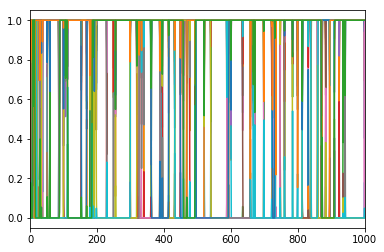

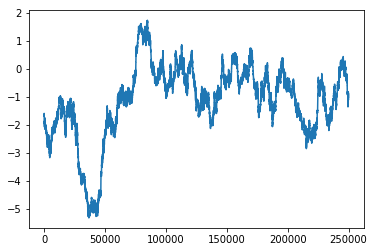

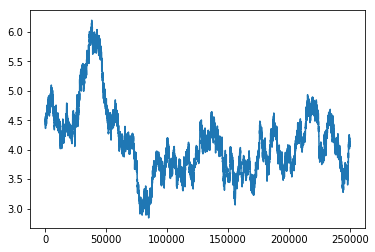

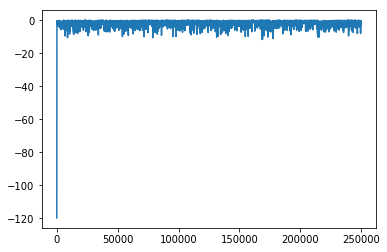

1.3416539725673458 0.6003954328529155


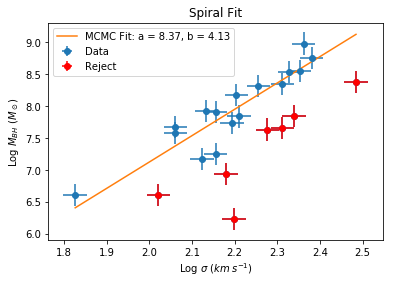

In [19]:
outliers1 = 1 - np.mean(Pbi, axis=0)
print("Probability of Outlier: ", outliers1)

outliers = outliers1

outliers[outliers > 0.9] = 1
outliers[outliers < 1] = 0

x1R = x1 * outliers
y1R = y1 * outliers
x1_errR = x1_err * outliers
y1_errR = y1_err * outliers

x1R = [ elem for elem in x1R if elem != 0]
y1R = [ elem for elem in y1R if elem != 0]
x1_errR = [ elem for elem in x1_errR if elem != 0]
y1_errR = [ elem for elem in y1_errR if elem != 0]


plt.plot(1 - Pbi)
plt.xlim(0,1000)
plt.show()


plt.plot(np.arange(len(ai)), ai)
plt.show()
plt.plot(np.arange(len(bi)), bi)
plt.show()
#plt.plot(np.arange(len(ci)), ci)
#plt.show()
plt.plot(np.arange(len(Li)), Li)
plt.show()

print(np.std(ai), np.std(bi))

# make M-sigma plot for spirals
plt.errorbar(x1, y1, y1_err, x1_err, "o", label="Data")
plt.errorbar(x1R, y1R, y1_errR, x1_errR, "o", color="red", label="Reject")
xp = np.linspace(np.amin(x1), np.amax(x1), 100)
#plt.plot(xp, 4.3*xp + np.log10(0.0245), label="Initial Guess: a = 8.37, b = 4.3")
plt.plot(xp, np.mean(bi)*xp + np.mean(ai), label="MCMC Fit: a = " + str(round(np.mean(ai) + np.log10(200**np.mean(bi)), 2)) + ", b = " + str(round(np.mean(bi), 2)))
plt.xlabel("Log $\sigma$ $(km \: s^{-1})$")
plt.ylabel("Log $M_{BH}$ $(M_\odot)$")
plt.legend()
plt.title("Spiral Fit")
plt.show()

In [53]:
# reset MCMC variables
ai = np.zeros(N)
bi = np.zeros(N)
#ci = np.zeros(N)
Li = np.zeros(N)
ai[0] = np.random.rand() + a - 0.5
bi[0] = np.random.rand() + b - 0.5
#ci[0] = np.random.rand()*0.1 + b - 0.05
delta1 = box_mueller(0, 0.05, N)
delta2 = box_mueller(0, 0.05, N)
#delta3 = box_mueller(0, 0.005, N)
accept_ellipticals = []



#Stuff for outlier detection
Pb0 = 0.5
PbSigma = 0.5

Pbi = np.full((N,len(x2)), 0.)
qi = np.full((N,len(x2)), 0.)

deltaPb = np.array([box_mueller(0, PbSigma, len(x2)) for j in range(N)]) #Steps for outlier probability walk

Pbi[0] =  np.full(len(x2),Pb0) #probability that a point is bad
qi[0] = np.array([np.random.binomial(1,Pbi[0][j],1)[0] for j in range(len(x2))]) #0 if rejected, 1 if accepted

#print(Pbi)


# run MCMC on ellipticals
for i in range(1,N):
    #test = [ai[i-1] + delta1[i], bi[i-1] + delta2[i], ci[i-1] + delta3[i]]
    test = [ai[i-1] + delta1[i], bi[i-1] + delta2[i]]
    
    
    #New selection of excluded points based on wandering probability Pb
    Pb_test = Pbi[i-1] + deltaPb[i-1]
    Pb_test[Pb_test < 0] = 0
    Pb_test[Pb_test > 1] = 1
    q_test = np.array([np.random.binomial(1,Pb_test[j],1)[0] for j in range(len(Pb_test))])
    
    
    
    # use covariance for likelihood test
    v_test = (1/np.sqrt(1+test[1]**2))*np.array([-test[1], 1])
    v_old = (1/np.sqrt(1+bi[i-1]**2))*np.array([-bi[i-1], 1])
    
    #Delta_test = np.array([np.dot(v_test, [x2[j], y2[j]]) - test[0]/np.sqrt(1+test[1]**2) for j in range(len(x2))])
    Delta_test = np.array([q_test[j]*(np.dot(v_test, [x2[j], y2[j]]) - test[0]/np.sqrt(1+test[1]**2)) for j in range(len(x2))])
    
    #Delta_old = np.array([np.dot(v_old, [x2[j], y2[j]]) - ai[i-1]/np.sqrt(1+bi[i-1]**2) for j in range(len(x2))])
    Delta_old = np.array([qi[i-1][j]*(np.dot(v_old, [x2[j], y2[j]]) - ai[i-1]/np.sqrt(1+bi[i-1]**2)) for j in range(len(x2))])
    
    Sigma2_test = np.array([np.matmul(np.matmul(v_test.T, S2[j]), v_test) for j in range(len(S2))])
    Sigma2_old = np.array([np.matmul(np.matmul(v_old.T, S2[j]), v_old) for j in range(len(S2))])
    P_test = -0.5*(np.sum(Delta_test**2/Sigma2_test))
    P_old = -0.5*(np.sum(Delta_old**2/Sigma2_old))
    #P_test = -0.5*(np.sum(np.log(Sigma2_test + test[2])) + np.sum(Delta_test**2/(Sigma2_test + test[2])))
    #P_old = -0.5*(np.sum(np.log(Sigma2_old + ci[i-1])) + np.sum(Delta_old**2/(Sigma2_old + ci[i-1])))

    if i == 1:
        Li[0] = P_old

    if P_test > P_old:
        accept_ellipticals.append(test)
        ai[i] = test[0]
        bi[i] = test[1]
        #ci[i] = test[2]
        Li[i] = P_test
        Pbi[i] = Pb_test
        qi[i] = q_test
        
    else:
        Li[i] = Li[i-1]
        r = np.random.rand()
        
        if np.log(r) < P_test - P_old:
            accept_ellipticals.append(test)
            ai[i] = test[0]
            bi[i] = test[1]
            #ci[i] = test[2]
            Pbi[i] = Pb_test
            qi[i] = q_test
            
        else:
            ai[i] = ai[i-1]
            bi[i] = bi[i-1]
            #ci[i] = ci[i-1]
            Pbi[i] = qi[i-1]
            qi[i] = qi[i-1]
            
# check acceptance rate for good fit values and parameter chains for convergence
print(len(accept_ellipticals))

32944


Probability of Outlier:  [0.71754939 0.64856006 0.74972618 0.74388134 0.71132091 0.68706319
 0.57635178 0.61328246 0.52695029 0.59324312 0.91541968 0.52657301
 0.65583983 0.53409598 0.77485613 0.6120147  0.66319152 0.63332392
 0.57214874 0.5362271  0.71500846 0.85459639 0.53135131 0.55664142
 0.5247778  0.53366051 0.59110074 0.5479577  0.76023612 0.5252202
 0.53001708 0.5590314  0.81578935 0.98117804 0.98462517 0.62870674]


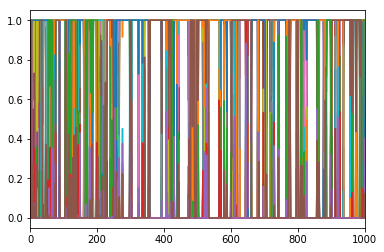

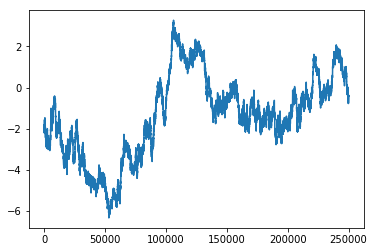

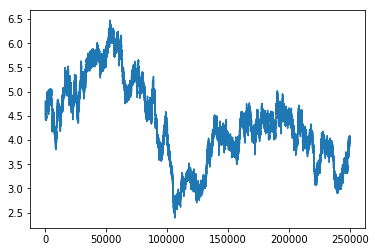

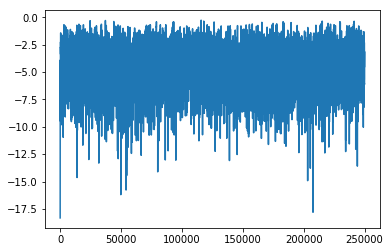

2.0180755834779327 0.84402404898939


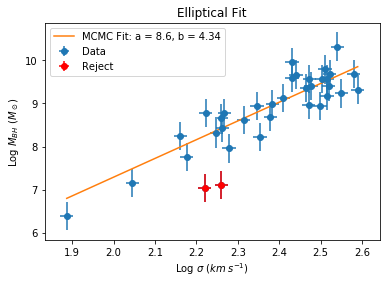

In [54]:
outliers2 = 1 - np.mean(Pbi, axis=0)
print("Probability of Outlier: ", outliers2)

outliers = outliers2

outliers[outliers > 0.95] = 1
outliers[outliers < 1] = 0

x2R = x2 * outliers
y2R = y2 * outliers
x2_errR = x2_err * outliers
y2_errR = y2_err * outliers

x2R = [ elem for elem in x2R if elem != 0]
y2R = [ elem for elem in y2R if elem != 0]
x2_errR = [ elem for elem in x2_errR if elem != 0]
y2_errR = [ elem for elem in y2_errR if elem != 0]

plt.plot(Pbi)
plt.xlim(0,1000)
plt.show()


plt.plot(np.arange(len(ai)), ai)
plt.show()
plt.plot(np.arange(len(bi)), bi)
plt.show()
#plt.plot(np.arange(len(ci)), ci)
#plt.show()
plt.plot(np.arange(len(Li)), Li)
plt.show()

print(np.std(ai), np.std(bi))

# make M-sigma plot for ellipticals
plt.errorbar(x2, y2, y2_err, x2_err, "o", label="Data")
#f = 34
#plt.errorbar(x2[f], y2[f], y2_err[f], x2_err[f], "o", color="green", label="Data")
plt.errorbar(x2R, y2R, y2_errR, x2_errR, "o", color="red", label="Reject")
xp = np.linspace(np.amin(x2), np.amax(x2), 100)
#plt.plot(xp, 4.3*xp + np.log10(0.0245), label="Initial Guess: a = 8.37, b = 4.3")
plt.plot(xp, np.mean(bi)*xp + np.mean(ai), label="MCMC Fit: a = " + str(round(np.mean(ai) + np.log10(200**np.mean(bi)), 2)) + ", b = " + str(round(np.mean(bi), 2)))
plt.xlabel("Log $\sigma$ $(km \: s^{-1})$")
plt.ylabel("Log $M_{BH}$ $(M_\odot)$")
plt.legend()
plt.title("Elliptical Fit")
plt.show()

In [55]:
# reset MCMC variables
ai = np.zeros(N)
bi = np.zeros(N)
#ci = np.zeros(N)
Li = np.zeros(N)
ai[0] = np.random.rand() + a - 0.5
bi[0] = np.random.rand() + b - 0.5
#ci[0] = np.random.rand()*0.1 + c - 0.05
delta1 = box_mueller(0, 0.05, N)
delta2 = box_mueller(0, 0.05, N)
#delta3 = box_mueller(0, 0.005, N)
accept_combined = []

#Stuff for outlier detection
Pb0 = 0.5
PbSigma = 0.5

Pbi = np.full((N,len(x3)), 0.)
qi = np.full((N,len(x3)), 0.)

deltaPb = np.array([box_mueller(0, PbSigma, len(x3)) for j in range(N)]) #Steps for outlier probability walk

Pbi[0] =  np.full(len(x3),Pb0) #probability that a point is bad
qi[0] = np.array([np.random.binomial(1,Pbi[0][j],1)[0] for j in range(len(x3))]) #0 if rejected, 1 if accepted




# run MCMC on combined
for i in range(1,N):
    #test = [ai[i-1] + delta1[i], bi[i-1] + delta2[i], ci[i-1] + delta3[i]]
    test = [ai[i-1] + delta1[i], bi[i-1] + delta2[i]]
    
    #New selection of excluded points based on wandering probability Pb
    Pb_test = Pbi[i-1] + deltaPb[i-1]
    Pb_test[Pb_test < 0] = 0
    Pb_test[Pb_test > 1] = 1
    q_test = np.array([np.random.binomial(1,Pb_test[j],1)[0] for j in range(len(Pb_test))])
    
    # use covariance for likelihood test
    v_test = (1/np.sqrt(1+test[1]**2))*np.array([-test[1], 1])
    v_old = (1/np.sqrt(1+bi[i-1]**2))*np.array([-bi[i-1], 1])
    #Delta_test = np.array([np.dot(v_test, [x3[j], y3[j]]) - test[0]/np.sqrt(1+test[1]**2) for j in range(len(x3))])
    Delta_test = np.array([q_test[j]*(np.dot(v_test, [x3[j], y3[j]]) - test[0]/np.sqrt(1+test[1]**2)) for j in range(len(x3))])
    
    #Delta_old = np.array([np.dot(v_old, [x3[j], y3[j]]) - ai[i-1]/np.sqrt(1+bi[i-1]**2) for j in range(len(x3))])
    Delta_old = np.array([qi[i-1][j]*(np.dot(v_old, [x3[j], y3[j]]) - ai[i-1]/np.sqrt(1+bi[i-1]**2)) for j in range(len(x3))])
    
    Sigma2_test = np.array([np.matmul(np.matmul(v_test.T, S3[j]), v_test) for j in range(len(S3))])
    Sigma2_old = np.array([np.matmul(np.matmul(v_old.T, S3[j]), v_old) for j in range(len(S3))])
    P_test = -0.5*(np.sum(Delta_test**2/Sigma2_test))
    P_old = -0.5*(np.sum(Delta_old**2/Sigma2_old))
    #P_test = -0.5*(np.sum(np.log(Sigma2_test + test[2])) + np.sum(Delta_test**2/(Sigma2_test + test[2])))
    #P_old = -0.5*(np.sum(np.log(Sigma2_old + ci[i-1])) + np.sum(Delta_old**2/(Sigma2_old + ci[i-1])))
    
    if i == 1:
        Li[0] = P_old

    if P_test > P_old:
        accept_combined.append(test)
        ai[i] = test[0]
        bi[i] = test[1]
        #ci[i] = test[2]
        Li[i] = P_test
        Pbi[i] = Pb_test
        qi[i] = q_test
        
    else:
        Li[i] = Li[i-1]
        r = np.random.rand()
        
        if np.log(r) < P_test - P_old:
            accept_combined.append(test)
            ai[i] = test[0]
            bi[i] = test[1]
            #ci[i] = test[2]
            Pbi[i] = Pb_test
            qi[i] = q_test
            
        else:
            ai[i] = ai[i-1]
            bi[i] = bi[i-1]
            #ci[i] = ci[i-1]
            Pbi[i] = qi[i-1]
            qi[i] = qi[i-1]
            
# check acceptance rate for good fit values and parameter chains for convergence
print(len(accept_combined))

8050


Probability of Outlier:  [0.77155675 0.60264529 0.87010236 0.72106642 0.89061527 0.87316158
 0.70777514 0.65237563 0.51392652 0.69432885 0.98848124 0.55984603
 0.60758555 0.59647394 0.82298833 0.76830664 0.69938227 0.73119886
 0.5707218  0.53059936 0.65692271 0.97471585 0.61101083 0.64116915
 0.61656104 0.52859203 0.55142232 0.64116672 0.69722206 0.58660439
 0.55674958 0.53182463 0.85168801 0.99652949 0.99685856 0.67216284
 0.50746025 0.5740778  0.53333048 0.73256886 0.99272617 0.58154759
 0.97131125 0.96795418 0.58574481 0.59707247 0.54636195 0.58226702
 0.52722388 0.56353596 0.52118114 0.55141413 0.61847719 0.5425934
 0.72917875]


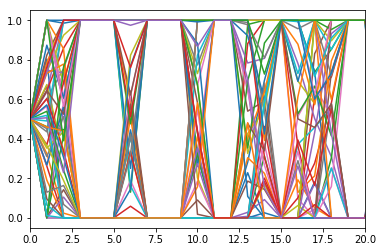

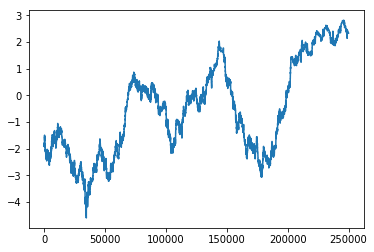

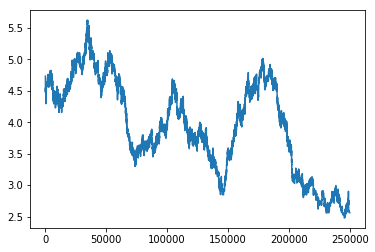

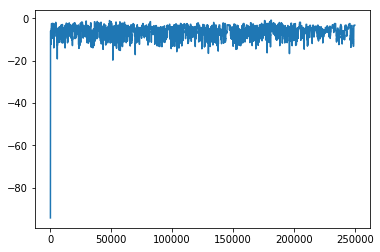

1.7322771684267793 0.7404528620321493


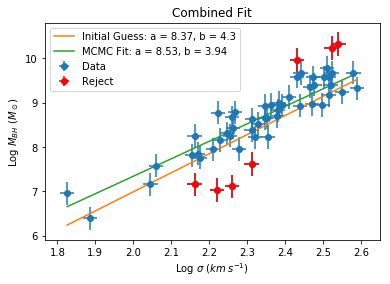

In [56]:
outliers3 = 1 - np.mean(Pbi, axis=0)
print("Probability of Outlier: ", outliers3)

outliers = outliers3

outliers[outliers > 0.95] = 1
outliers[outliers < 1] = 0

x3R = x3 * outliers
y3R = y3 * outliers
x3_errR = x3_err * outliers
y3_errR = y3_err * outliers

x3R = [ elem for elem in x3R if elem != 0]
y3R = [ elem for elem in y3R if elem != 0]
x3_errR = [ elem for elem in x3_errR if elem != 0]
y3_errR = [ elem for elem in y3_errR if elem != 0]

plt.plot(Pbi)
plt.xlim(0,20)
plt.show()


plt.plot(np.arange(len(ai)), ai)
plt.show()
plt.plot(np.arange(len(bi)), bi)
plt.show()
#plt.plot(np.arange(len(ci)), ci)
#plt.show()
plt.plot(np.arange(len(Li)), Li)
plt.show()

print(np.std(ai), np.std(bi))

# make M-sigma plot for combined
plt.errorbar(x3, y3, y3_err, x3_err, "o", label="Data")
plt.errorbar(x3R, y3R, y3_errR, x3_errR, "o", color="red", label="Reject")
xp = np.linspace(np.amin(x3), np.amax(x3), 100)
plt.plot(xp, 4.3*xp + np.log10(0.0245), label="Initial Guess: a = 8.37, b = 4.3")
plt.plot(xp, np.mean(bi)*xp + np.mean(ai), label="MCMC Fit: a = " + str(round(np.mean(ai) + np.log10(200**np.mean(bi)), 2)) + ", b = " + str(round(np.mean(bi), 2)))
plt.xlabel("Log $\sigma$ $(km \: s^{-1})$")
plt.ylabel("Log $M_{BH}$ $(M_\odot)$")
plt.legend()
plt.title("Combined Fit")
plt.show()

(1.0, 0.0)


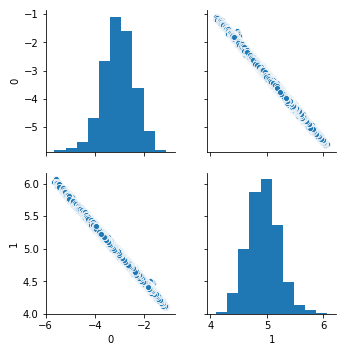

In [8]:
# make a corner plot for spirals
print(stats.pearsonr(accept_spirals[0], accept_spirals[1]))
accept_spirals = pandas.DataFrame(accept_spirals)
seaborn.pairplot(accept_spirals)

(1.0, 0.0)


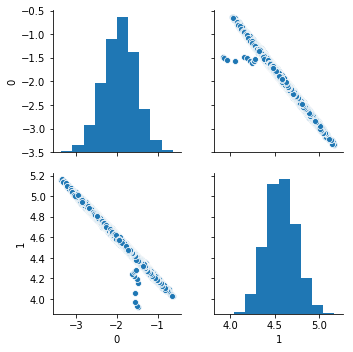

In [9]:
# make a corner plot for ellipticals
print(stats.pearsonr(accept_ellipticals[0], accept_ellipticals[1]))
accept_ellipticals = pandas.DataFrame(accept_ellipticals)
seaborn.pairplot(accept_ellipticals)

(1.0, 0.0)


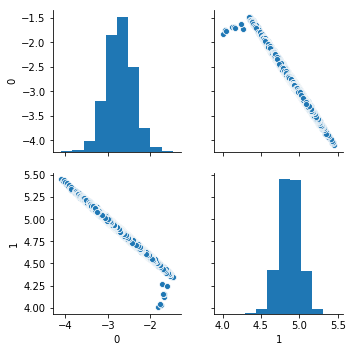

In [10]:
# make a corner plot for combined
print(stats.pearsonr(accept_combined[0], accept_combined[1]))
accept_combined = pandas.DataFrame(accept_combined)
seaborn.pairplot(accept_combined)

In [13]:
np.random.binomial(1, 0.5, 100)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])